In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("/kaggle/input/high-dimensional-supply-chain-inventory-dataset/supply_chain_dataset1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91250 entries, 0 to 91249
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     91250 non-null  object 
 1   SKU_ID                   91250 non-null  object 
 2   Warehouse_ID             91250 non-null  object 
 3   Supplier_ID              91250 non-null  object 
 4   Region                   91250 non-null  object 
 5   Units_Sold               91250 non-null  int64  
 6   Inventory_Level          91250 non-null  int64  
 7   Supplier_Lead_Time_Days  91250 non-null  int64  
 8   Reorder_Point            91250 non-null  int64  
 9   Order_Quantity           91250 non-null  int64  
 10  Unit_Cost                91250 non-null  float64
 11  Unit_Price               91250 non-null  float64
 12  Promotion_Flag           91250 non-null  int64  
 13  Stockout_Flag            91250 non-null  int64  
 14  Demand_Forecast       

In [4]:
df.head(10)

,Date,SKU_ID,Warehouse_ID,Supplier_ID,Region,Units_Sold,Inventory_Level,Supplier_Lead_Time_Days,Reorder_Point,Order_Quantity,Unit_Cost,Unit_Price,Promotion_Flag,Stockout_Flag,Demand_Forecast
0,2024-01-01,SKU_1,WH_1,SUP_8,West,10,592,14,379,0,13.95,20.48,0,0,8.52
1,2024-01-02,SKU_1,WH_1,SUP_8,West,17,575,14,379,0,13.95,20.48,0,0,18.63
2,2024-01-03,SKU_1,WH_1,SUP_8,North,35,540,14,379,0,13.95,20.48,1,0,39.62
3,2024-01-04,SKU_1,WH_1,SUP_8,South,24,516,14,379,0,13.95,20.48,0,0,19.43
4,2024-01-05,SKU_1,WH_1,SUP_8,West,21,495,14,379,0,13.95,20.48,0,0,18.70
5,2024-01-06,SKU_1,WH_1,SUP_8,East,18,477,14,379,0,13.95,20.48,0,0,18.33
6,2024-01-07,SKU_1,WH_1,SUP_8,North,19,458,14,379,0,13.95,20.48,0,0,18.91
7,2024-01-08,SKU_1,WH_1,SUP_8,North,23,435,14,379,0,13.95,20.48,1,0,25.84
8,2024-01-09,SKU_1,WH_1,SUP_8,West,25,410,14,379,0,13.95,20.48,0,0,21.70
9,2024-01-10,SKU_1,WH_1,SUP_8,South,25,385,14,379,0,13.95,20.48,0,0,21.34


In [5]:
Missing_values = df.isna().sum().sum()
print(f'The Number of Missing Values is {Missing_values}')

The Number of Missing Values is 0


In [6]:
Null_Values = df.isnull().sum().sum()
print(f'The number of Null values is {Null_Values}')

The number of Null values is 0


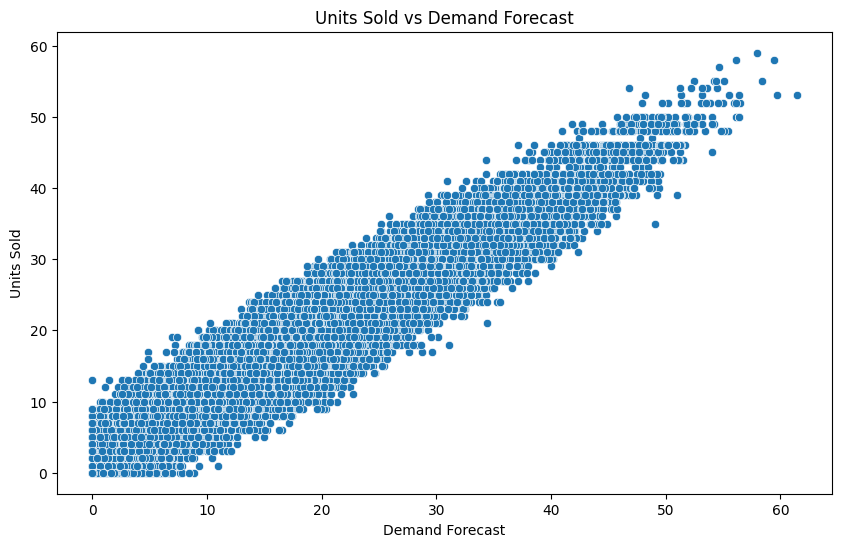

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Demand_Forecast', y='Units_Sold')
plt.title('Units Sold vs Demand Forecast')
plt.xlabel('Demand Forecast')
plt.ylabel('Units Sold')
plt.show()

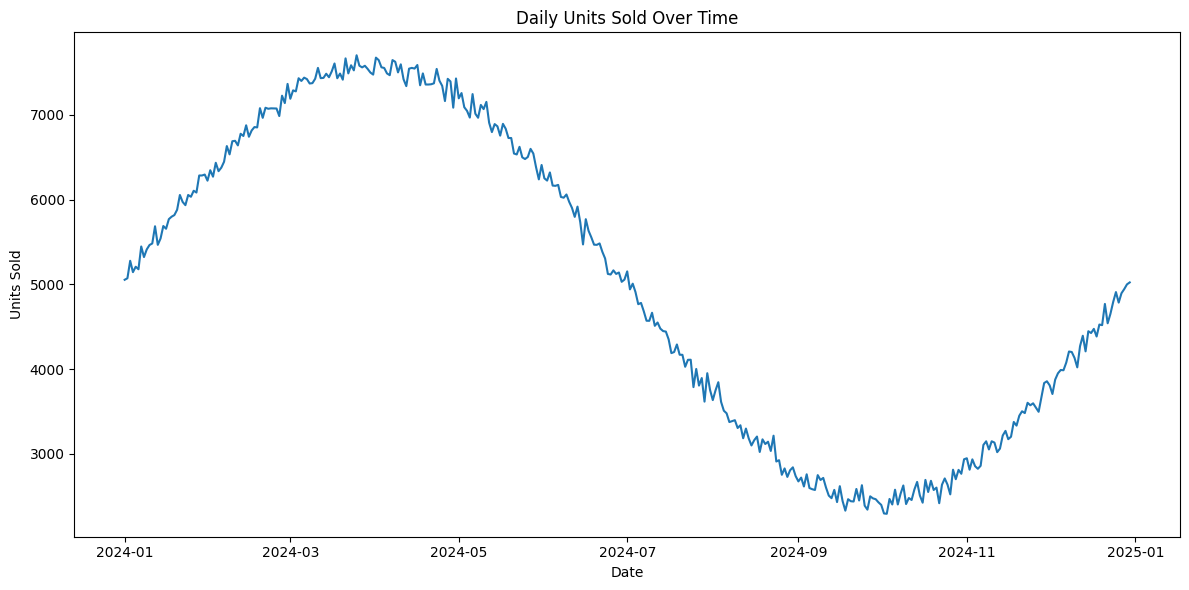

In [8]:
daily_sales = df.groupby('Date')['Units_Sold'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(daily_sales['Date']), daily_sales['Units_Sold'])
plt.title('Daily Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

In [9]:
sku_id = "SKU_1"
df_sku = df[df["SKU_ID"] == sku_id].copy()
df_sku = df_sku.sort_values("Date")

In [10]:
# Create Two Types of Datasets (cleaned and unclean)
df_clean = df_sku.copy()
df_raw = df_sku.copy()

In [11]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = ['Units_Sold', 'Inventory_Level', 'Order_Quantity',
            'Unit_Cost', 'Unit_Price', 'Demand_Forecast']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean[num_cols])

In [12]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
df_clean['outlier'] = ocsvm.fit_predict(scaled_data)
df_clean['outlier'] = df_clean['outlier'].map({1:0, -1:1})

df_clean.head()

,Date,SKU_ID,Warehouse_ID,Supplier_ID,Region,Units_Sold,Inventory_Level,Supplier_Lead_Time_Days,Reorder_Point,Order_Quantity,Unit_Cost,Unit_Price,Promotion_Flag,Stockout_Flag,Demand_Forecast,outlier
0,2024-01-01,SKU_1,WH_1,SUP_8,West,10,592,14,379,0,13.95,20.48,0,0,8.52,0
1460,2024-01-01,SKU_1,WH_5,SUP_5,East,20,640,4,366,0,19.41,23.81,0,0,19.18,0
1095,2024-01-01,SKU_1,WH_4,SUP_2,East,15,522,9,333,0,6.93,10.70,0,0,14.01,0
730,2024-01-01,SKU_1,WH_3,SUP_9,West,16,505,6,314,0,6.06,8.41,1,0,18.05,0
365,2024-01-01,SKU_1,WH_2,SUP_5,East,20,843,8,322,0,11.46,19.92,0,0,21.14,1


In [13]:
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
df_raw['outlier'] = ocsvm.fit_predict(scaled_data)
df_raw['outlier'] = df_raw['outlier'].map({1:0, -1:1})

In [14]:
for col in num_cols:
    df_clean.loc[df_clean['outlier'] == 1, col] = None
    df_clean[col] = df_clean[col].interpolate(method='linear')

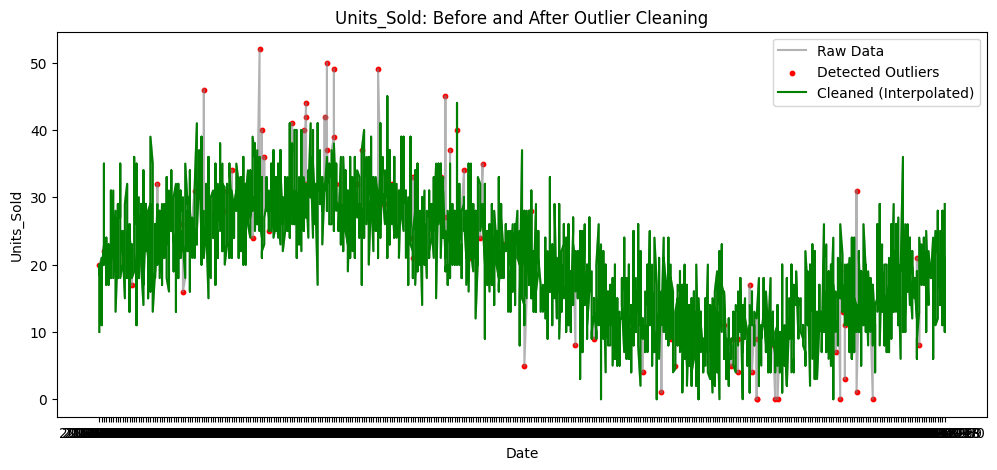

In [15]:
col = 'Units_Sold'

plt.figure(figsize=(12,5))
plt.plot(df_raw['Date'], df_raw[col], color='gray', alpha=0.6, label='Raw Data')
plt.scatter(df_raw['Date'][df_raw['outlier']==1], df_raw[col][df_raw['outlier']==1],
            color='red', label='Detected Outliers', s=10)

plt.plot(df_clean['Date'], df_clean[col], color='green', label='Cleaned (Interpolated)')
plt.title(f"{col}: Before and After Outlier Cleaning")
plt.xlabel('Date')
plt.ylabel(col)
plt.legend()
plt.show()

In [16]:
n = len(df_clean)
holdout_size = int(0.1 * n)
remaining = n - holdout_size
grid_cv_size = int((2/3) * remaining)

holdout_set = df_clean.iloc[-holdout_size:]
grid_cv_set = df_clean.iloc[:grid_cv_size]
metamodel_set = df_clean.iloc[grid_cv_size:remaining]

In [17]:
holdout_set.head()

,Date,SKU_ID,Warehouse_ID,Supplier_ID,Region,Units_Sold,Inventory_Level,Supplier_Lead_Time_Days,Reorder_Point,Order_Quantity,Unit_Cost,Unit_Price,Promotion_Flag,Stockout_Flag,Demand_Forecast,outlier
328,2024-11-24,SKU_1,WH_1,SUP_8,North,19.0,386.0,14,379,0.0,13.95,20.48,1,0,18.13,0
1058,2024-11-24,SKU_1,WH_3,SUP_9,South,14.0,656.0,6,314,0.0,6.06,8.41,0,0,13.00,0
329,2024-11-25,SKU_1,WH_1,SUP_8,South,13.0,373.0,14,379,0.0,13.95,20.48,0,0,10.46,0
1424,2024-11-25,SKU_1,WH_4,SUP_2,North,18.0,332.0,9,333,0.0,6.93,10.70,0,0,18.69,0
1789,2024-11-25,SKU_1,WH_5,SUP_5,West,11.0,737.0,4,366,0.0,19.41,23.81,1,0,11.79,0


In [18]:
print(len(holdout_set))
print(len(grid_cv_set))
print(len(metamodel_set))

182
1095
548


# Training phase

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, GlobalMaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore') # Suppress potential warnings from TensorFlow

2025-10-20 08:42:39.927387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760949760.222153      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760949760.304508      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
# Define the sequence length (e.g., use past 30 days to predict the next day)
sequence_length = 30 # You can adjust this value
print(f"Using sequence length: {sequence_length}")

Using sequence length: 30


In [22]:
import numpy as np

# --- Data Preparation for Deep Learning ---

# Ensure the numerical columns are correctly identified
feature_columns = num_cols # Using the list you defined: ['Units_Sold', 'Inventory_Level', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Demand_Forecast']

# Extract the relevant features for each set
X_grid_cv = grid_cv_set[feature_columns].values
X_metamodel = metamodel_set[feature_columns].values
X_holdout = holdout_set[feature_columns].values

# Scale the features using the scaler fitted on the full df_clean dataset
X_grid_cv_scaled = scaler.transform(X_grid_cv)
X_metamodel_scaled = scaler.transform(X_metamodel)
X_holdout_scaled = scaler.transform(X_holdout)

# Target variable (Units_Sold)
y_grid_cv = grid_cv_set['Units_Sold'].values
y_metamodel = metamodel_set['Units_Sold'].values
y_holdout = holdout_set['Units_Sold'].values

# Function to create sequences
def create_sequences(data, target, seq_length):
    X_seq, y_seq = [], []
    for i in range(seq_length, len(data)):
        X_seq.append(data[i-seq_length:i])
        y_seq.append(target[i])
    return np.array(X_seq), np.array(y_seq)

# Apply the function to create sequences for training, meta-training, and holdout sets
X_grid_cv_seq, y_grid_cv_seq = create_sequences(X_grid_cv_scaled, y_grid_cv, sequence_length)
X_metamodel_seq, y_metamodel_seq = create_sequences(X_metamodel_scaled, y_metamodel, sequence_length)
X_holdout_seq, y_holdout_seq = create_sequences(X_holdout_scaled, y_holdout, sequence_length)

print(f"Shape of X_grid_cv_seq: {X_grid_cv_seq.shape}") # Expected: (num_samples_grid_cv, sequence_length, num_features)
print(f"Shape of y_grid_cv_seq: {y_grid_cv_seq.shape}") # Expected: (num_samples_grid_cv,)
print(f"Shape of X_metamodel_seq: {X_metamodel_seq.shape}")
print(f"Shape of y_metamodel_seq: {y_metamodel_seq.shape}")
print(f"Shape of X_holdout_seq: {X_holdout_seq.shape}")
print(f"Shape of y_holdout_seq: {y_holdout_seq.shape}")

Shape of X_grid_cv_seq: (1065, 30, 6)
Shape of y_grid_cv_seq: (1065,)
Shape of X_metamodel_seq: (518, 30, 6)
Shape of y_metamodel_seq: (518,)
Shape of X_holdout_seq: (152, 30, 6)
Shape of y_holdout_seq: (152,)


In [23]:
# --- Base Model Construction and Training ---

# Define common parameters for base models
epochs = 50 # Adjust based on performance and overfitting
batch_size = 32
validation_split = 0.1 # Use part of grid_cv_set for validation during training
verbose = 1 # Set to 1 to see training progress

# Ensure data shapes are correct for each model type
num_features = X_grid_cv_seq.shape[2]

# 1. MLP Model
def create_mlp_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1) # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

mlp_model = create_mlp_model((sequence_length, num_features))
print("Training MLP Model...")
mlp_history = mlp_model.fit(
    X_grid_cv_seq, y_grid_cv_seq,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    verbose=verbose,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)
print("MLP Model Training Complete.")

Training MLP Model...
Epoch 1/50


2025-10-20 08:43:56.880162: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 525.7780 - mae: 22.0440 - val_loss: 223.3503 - val_mae: 13.9112
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.3862 - mae: 8.2691 - val_loss: 184.6967 - val_mae: 12.4617
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75.0855 - mae: 6.9671 - val_loss: 140.6870 - val_mae: 10.6041
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.6705 - mae: 5.9711 - val_loss: 93.4232 - val_mae: 8.2198
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44.0856 - mae: 5.2155 - val_loss: 57.5043 - val_mae: 6.2531
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.5401 - mae: 4.2610 - val_loss: 42.5796 - val_mae: 5.3662
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.5720 - mae: 4.0026 - val_loss: 42.0240 - val_mae: 5.2666
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.7603 - mae: 3.7061 - val_loss: 43.0007 - val_mae: 5.3303
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 

In [24]:
# 2. LSTM Model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1) # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

lstm_model = create_lstm_model((sequence_length, num_features))
print("Training LSTM Model...")
lstm_history = lstm_model.fit(
    X_grid_cv_seq, y_grid_cv_seq,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    verbose=verbose,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)
print("LSTM Model Training Complete.")

Training LSTM Model...
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 587.6432 - mae: 23.3018 - val_loss: 184.0561 - val_mae: 11.0380
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 78.1445 - mae: 7.2297 - val_loss: 135.8814 - val_mae: 10.1266
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 39.0472 - mae: 4.9837 - val_loss: 103.6634 - val_mae: 8.6479
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 36.8130 - mae: 4.7958 - val_loss: 103.4330 - val_mae: 8.6519
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 37.8966 - mae: 4.9489 - val_loss: 99.3313 - val_mae: 8.4444
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 36.0670 - mae: 4.7449 - val_loss: 98.6976 - val_mae: 8.4137
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 33.6417 - mae: 4.5929 - val_loss: 94.5895 - val_mae: 8.1798
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 34.7626 - mae: 4.7318 - val_loss: 87.8628 - val_mae: 7.8238
Epoch 9/50
30/30 

In [25]:
# 3. 1D-CNN Model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        GlobalMaxPooling1D(), # Or Flatten()
        Dense(50, activation='relu'),
        Dense(1) # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

cnn_model = create_cnn_model((sequence_length, num_features))
print("Training 1D-CNN Model...")
cnn_history = cnn_model.fit(
    X_grid_cv_seq, y_grid_cv_seq,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    verbose=verbose,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)
print("1D-CNN Model Training Complete.")

Training 1D-CNN Model...
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 565.7342 - mae: 22.7634 - val_loss: 51.3044 - val_mae: 5.6929
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 52.0351 - mae: 5.8679 - val_loss: 35.4870 - val_mae: 4.7682
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31.4350 - mae: 4.5180 - val_loss: 32.6506 - val_mae: 4.6260
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26.4650 - mae: 4.1076 - val_loss: 32.3177 - val_mae: 4.5972
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.1729 - mae: 4.1578 - val_loss: 32.4137 - val_mae: 4.5980
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.6757 - mae: 4.1180 - val_loss: 32.5277 - val_mae: 4.6117
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.1023 - mae: 4.0559 - val_loss: 32.6274 - val_mae: 4.6036
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.2090 - mae: 4.1210 - val_loss: 32.5950 - val_mae: 4.6055
Epoch 9/50
30/30 ━━━━━━━━━

In [26]:
# --- Generate Predictions for Meta-learner Training ---
print("Generating predictions for meta-learner training...")
# Predict on the meta-training sequences using the trained base models
mlp_meta_pred = mlp_model.predict(X_metamodel_seq, verbose=0).flatten() # Flatten to (num_samples,)
lstm_meta_pred = lstm_model.predict(X_metamodel_seq, verbose=0).flatten()
cnn_meta_pred = cnn_model.predict(X_metamodel_seq, verbose=0).flatten()

# Combine the predictions to form the input for the meta-learner
# Shape should be (num_samples_metamodel, 3)
X_meta_learner = np.column_stack((mlp_meta_pred, lstm_meta_pred, cnn_meta_pred))
y_meta_learner = y_metamodel_seq # The actual target values for the meta-training set

print(f"Shape of X_meta_learner (input for meta-learner): {X_meta_learner.shape}")
print(f"Shape of y_meta_learner (target for meta-learner): {y_meta_learner.shape}")

Generating predictions for meta-learner training...
Shape of X_meta_learner (input for meta-learner): (518, 3)
Shape of y_meta_learner (target for meta-learner): (518,)


In [27]:
# --- Meta-learner Training ---
def create_meta_model(input_dim):
    model = Sequential([
        Dense(10, activation='relu', input_dim=input_dim),
        Dense(5, activation='relu'),
        Dense(1) # Output the final ensemble prediction
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

meta_model = create_meta_model(X_meta_learner.shape[1]) # Input dim is 3 (number of base models)
print("Training Meta-learner Model...")
meta_history = meta_model.fit(
    X_meta_learner, y_meta_learner,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    verbose=verbose,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)
print("Meta-learner Model Training Complete.")

Training Meta-learner Model...
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 76.1542 - mae: 7.3321 - val_loss: 116.9473 - val_mae: 9.5546
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 58.1641 - mae: 6.2469 - val_loss: 92.7125 - val_mae: 8.2624
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.9584 - mae: 5.3215 - val_loss: 73.3501 - val_mae: 7.2304
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 34.4857 - mae: 4.7103 - val_loss: 58.9986 - val_mae: 6.3714
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28.1007 - mae: 4.1436 - val_loss: 49.6660 - val_mae: 5.7459
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.7443 - mae: 4.2624 - val_loss: 44.0231 - val_mae: 5.3866
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.0809 - mae: 4.3745 - val_loss: 41.5083 - val_mae: 5.2119
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.6567 - mae: 4.0631 - val_loss: 40.4826 - val_mae: 5.1205
Epoch 9/50
15/15 ━━━━━━

Generating final ensemble predictions on holdout set...
Final ensemble predictions shape on holdout: (152,)
Actual target shape on holdout: (152,)
Holdout Set - MAE: 5.7459, RMSE: 7.1820


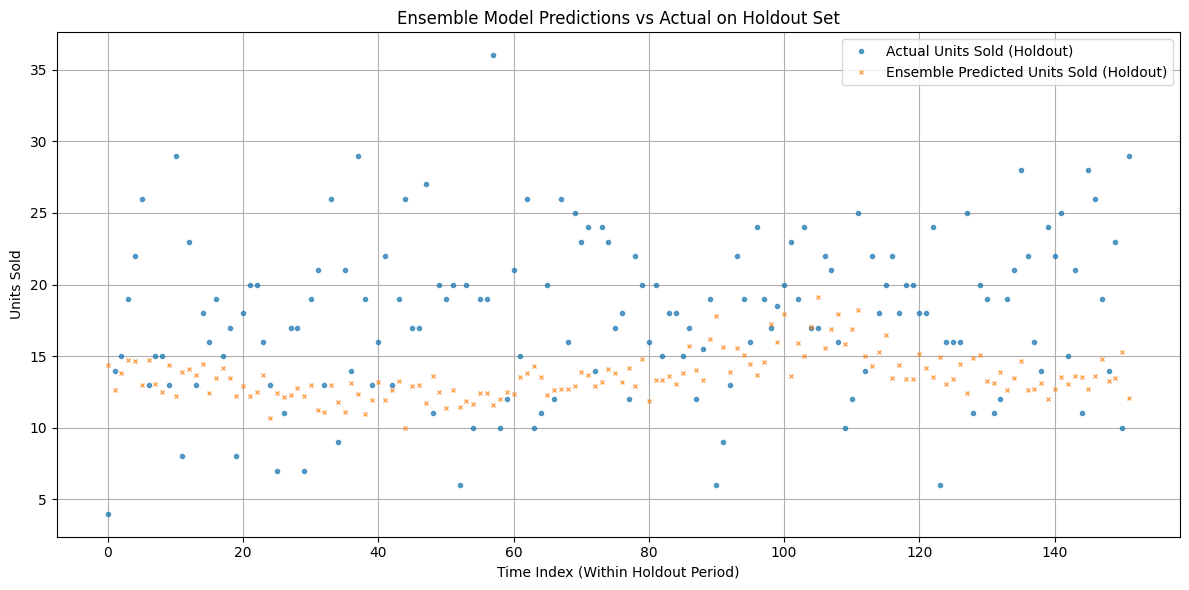

Holdout evaluation complete. Predictions and actuals stored.


In [29]:
# --- Final Ensemble Prediction on Holdout Set (Evaluation) ---
print("Generating final ensemble predictions on holdout set...")
# Predict on holdout sequences using base models
mlp_holdout_pred = mlp_model.predict(X_holdout_seq, verbose=0).flatten()
lstm_holdout_pred = lstm_model.predict(X_holdout_seq, verbose=0).flatten()
cnn_holdout_pred = cnn_model.predict(X_holdout_seq, verbose=0).flatten()

# Combine base predictions for holdout
X_holdout_meta = np.column_stack((mlp_holdout_pred, lstm_holdout_pred, cnn_holdout_pred))

# Get final ensemble prediction using the meta-learner
final_ensemble_pred_holdout = meta_model.predict(X_holdout_meta, verbose=0).flatten()

print(f"Final ensemble predictions shape on holdout: {final_ensemble_pred_holdout.shape}")
print(f"Actual target shape on holdout: {y_holdout_seq.shape}")

sku_id = "SKU_1"
df_sku = df[df["SKU_ID"] == sku_id].copy()
df_sku = df_sku.sort_values("Date")

# Optional: Calculate metrics on holdout (e.g., MAE, RMSE)
if len(y_holdout_seq) > 0:
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    mae = mean_absolute_error(y_holdout_seq, final_ensemble_pred_holdout)
    rmse = np.sqrt(mean_squared_error(y_holdout_seq, final_ensemble_pred_holdout))
    print(f"Holdout Set - MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Plot the holdout set predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_holdout_seq, label='Actual Units Sold (Holdout)', marker='o', linestyle='', markersize=3, alpha=0.7)
plt.plot(final_ensemble_pred_holdout, label='Ensemble Predicted Units Sold (Holdout)', marker='x', linestyle='', markersize=3, alpha=0.7)
plt.title('Ensemble Model Predictions vs Actual on Holdout Set')
plt.xlabel('Time Index (Within Holdout Period)')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Store the holdout predictions if needed for later analysis
holdout_predictions_for_analysis = final_ensemble_pred_holdout
actual_holdout_values = y_holdout_seq

print("Holdout evaluation complete. Predictions and actuals stored.")

In [30]:
import pickle

# Assuming your models (mlp_model, lstm_model, cnn_model, meta_model) and scaler are defined
# and 'sequence_length' is the value you used.

# Define a dictionary to hold all necessary components for inference
model_components = {
    'mlp_model': mlp_model,
    'lstm_model': lstm_model,
    'cnn_model': cnn_model,
    'meta_model': meta_model,
    'scaler': scaler, # The scaler fitted on the training data
    'sequence_length': sequence_length, # The sequence length used for training
    'feature_columns': feature_columns # The list of feature names used
}

# Save the components to a pickle file
model_filename = 'ensemble_forecast_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model_components, file)

print(f"Ensemble model components saved to {model_filename}")

Ensemble model components saved to ensemble_forecast_model.pkl
